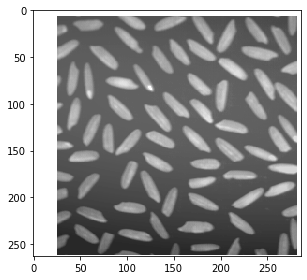

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

image = io.imread("rice.gif", as_gray=True)
io.imshow(image)

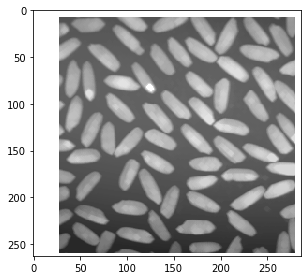

In [10]:
from skimage.filters.rank import maximum
from skimage.morphology import disk

background = maximum(image, disk(2))
io.imshow(background, cmap=plt.cm.gray)

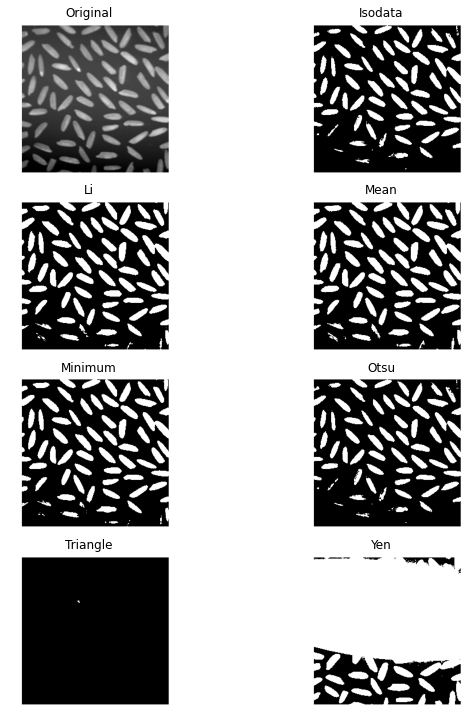

In [11]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(image, figsize=(10, 10), verbose=False)
plt.show()

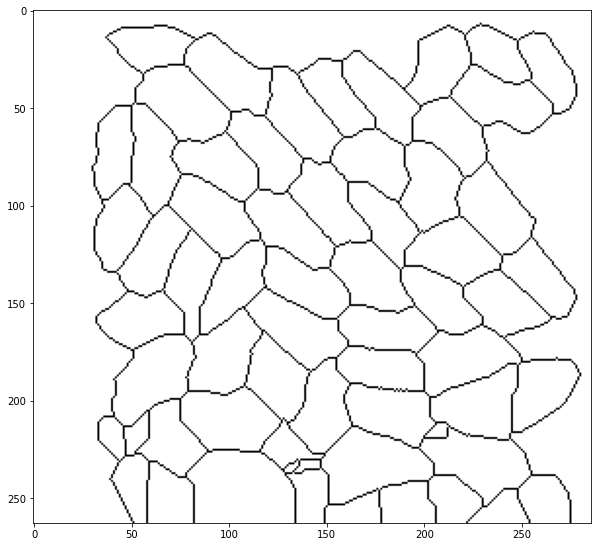

In [12]:
from skimage.filters import threshold_yen, threshold_mean
from skimage.morphology import binary_erosion, square
from skimage.segmentation import watershed
from matplotlib import pyplot as plt

binary_image = threshold_mean(image) < image
binary_image = 1 * binary_image

image_erosion = binary_erosion(binary_image, square(3)) * 1
image_watershed = watershed(1 - image_erosion, watershed_line=True)

lines = np.full(image_watershed.shape, 1)
lines[image_watershed == 0] = 0

plt.figure(figsize = (10,10))
plt.imshow(lines, cmap=plt.cm.gray)

g:\Mateusz\PROGRAMOWANIE\VS Code\PSIO\venv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


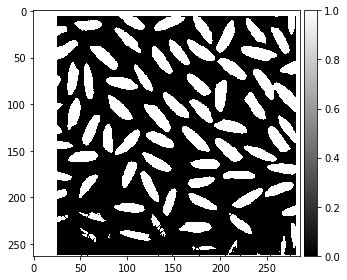

In [13]:
rice = lines * binary_image
io.imshow(rice, cmap=plt.cm.gray)

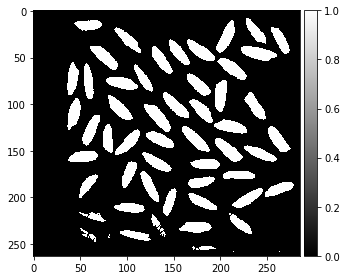

In [14]:
from skimage.segmentation import clear_border

rice_clear_border = clear_border(rice)

io.imshow(rice_clear_border, cmap=plt.cm.gray)

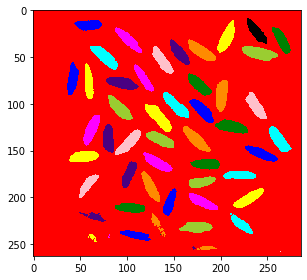

In [15]:
from skimage.measure import label
from skimage.color import label2rgb

labels, num = label(rice_clear_border, return_num=True)
labels_rgb = label2rgb(labels, bg_label=1)

io.imshow(labels_rgb)

<BarContainer object of 10 artists>

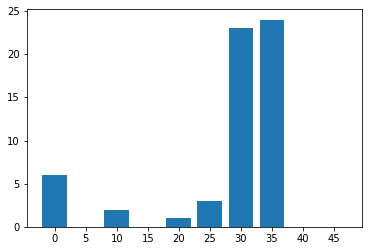

In [16]:
from skimage.measure import regionprops

all_measures = regionprops(labels)

array_of_length = []

for x in all_measures:
    array_of_length.append(x.major_axis_length)
    
    
y, x = np.histogram(array_of_length, bins = 10, range = (0, 50))
bar = [str(int(i)) for i in x]
plt.bar(bar[:-1], y)